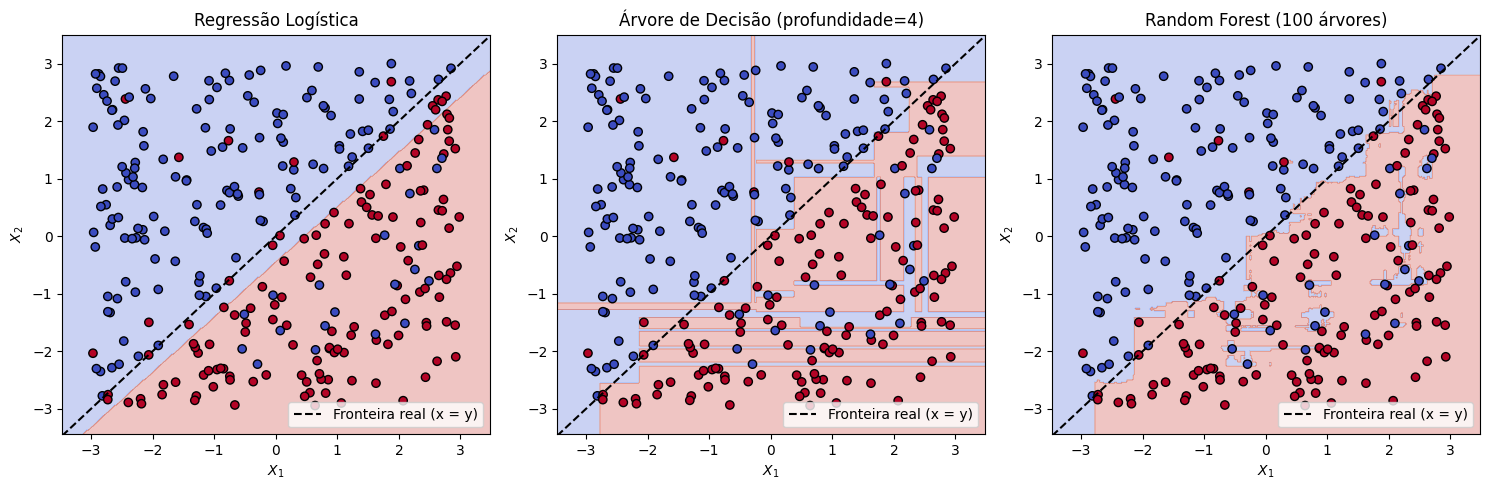

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# --- 1. Gerar dados ---

np.random.seed(42)
n = 300
X = np.random.uniform(-3, 3, size=(n, 2))
y = (X[:, 0] > X[:, 1]).astype(int)  # Classe 1 se x > y, senão 0

# Adicionar ruído: 10% dos rótulos são trocados
noise_fraction = 0.10
n_noisy = int(n * noise_fraction)
noise_idx = np.random.choice(n, size=n_noisy, replace=False)
y[noise_idx] = 1 - y[noise_idx]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# --- 2. Treinar modelos ---

# Regressão logística
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Árvore de decisão
tree = DecisionTreeClassifier(max_depth=10, random_state=42)
tree.fit(X_train, y_train)

# Random Forest
rf = RandomForestClassifier(
    n_estimators=500, max_features=1, random_state=42
)
rf.fit(X_train, y_train)

# --- 3. Função para plotar a fronteira ---

def plot_decision_boundary(model, X, y, ax, title):
    h = 0.02
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, h),
        np.arange(y_min, y_max, h)
    )
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
    ax.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.coolwarm)
    # Adicionar a fronteira real x = y
    ax.plot([x_min, x_max], [x_min, x_max], 'k--', linewidth=1.5, label="Fronteira real (x = y)")
    ax.set_title(title)
    ax.set_xlabel("$X_1$")
    ax.set_ylabel("$X_2$")
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.legend(loc='lower right')

# --- 4. Plotar as fronteiras lado a lado ---

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

plot_decision_boundary(logreg, X, y, axes[0], "Regressão Logística")
plot_decision_boundary(tree, X, y, axes[1], "Árvore de Decisão (profundidade=4)")
plot_decision_boundary(rf, X, y, axes[2], "Random Forest (100 árvores)")

plt.tight_layout()
plt.show()


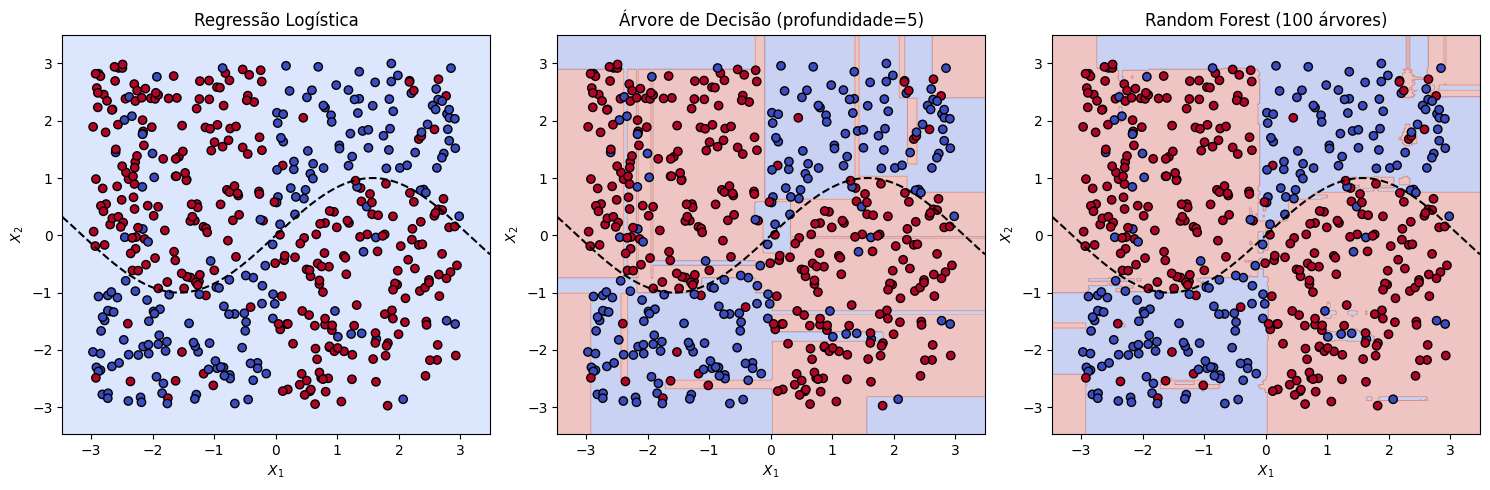

In [9]:
np.random.seed(42)
n = 500
X = np.random.uniform(-3, 3, size=(n, 2))

# Fronteira em formato de S
def s_boundary(x):
    return np.sin(x)

y = np.zeros(n)
for i in range(n):
    if X[i, 0] < 0:
        y[i] = int(X[i, 1] > s_boundary(X[i, 0]))
    else:
        y[i] = int(X[i, 1] < s_boundary(X[i, 0]))

# Adicionar ruído: 10% dos rótulos são trocados
noise_fraction = 0.10
n_noisy = int(n * noise_fraction)
noise_idx = np.random.choice(n, size=n_noisy, replace=False)
y[noise_idx] = 1 - y[noise_idx]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# --- 2. Treinar modelos ---

# Regressão logística
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Árvore de decisão
tree = DecisionTreeClassifier(max_depth=10, random_state=42)
tree.fit(X_train, y_train)

# Random Forest
rf = RandomForestClassifier(
    n_estimators=500, max_features=1, random_state=42
)
rf.fit(X_train, y_train)

# --- 3. Função para plotar a fronteira ---

def plot_decision_boundary(model, X, y, ax, title):
    h = 0.02
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, h),
        np.arange(y_min, y_max, h)
    )
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
    ax.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.coolwarm)
    
    # Plotar a fronteira real
    x_vals = np.linspace(x_min, x_max, 500)
    y_vals = s_boundary(x_vals)
    ax.plot(x_vals[x_vals < 0], y_vals[x_vals < 0], 'k--', linewidth=1.5)
    ax.plot(x_vals[x_vals > 0], y_vals[x_vals > 0], 'k--', linewidth=1.5)

    ax.set_title(title)
    ax.set_xlabel("$X_1$")
    ax.set_ylabel("$X_2$")
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)

# --- 4. Plotar as fronteiras lado a lado ---

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

plot_decision_boundary(logreg, X, y, axes[0], "Regressão Logística")
plot_decision_boundary(tree, X, y, axes[1], "Árvore de Decisão (profundidade=5)")
plot_decision_boundary(rf, X, y, axes[2], "Random Forest (100 árvores)")

plt.tight_layout()
plt.show()
